File ‘ml-100k.zip’ already there; not retrieving.

Archive:  ml-100k.zip
Ratings dataset shape: (100000, 4)
Movies dataset shape: (1682, 5)

First few rows of ratings data:


,user_id,movie_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596



First few rows of movies data:


,movie_id,title,release_date,video_release_date,imdb_url
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995)


Missing values in ratings:
user_id      0
movie_id     0
rating       0
timestamp    0
dtype: int64

Missing values in movies:
movie_id                 0
title                    0
release_date             1
video_release_date    1682
imdb_url                 3
dtype: int64


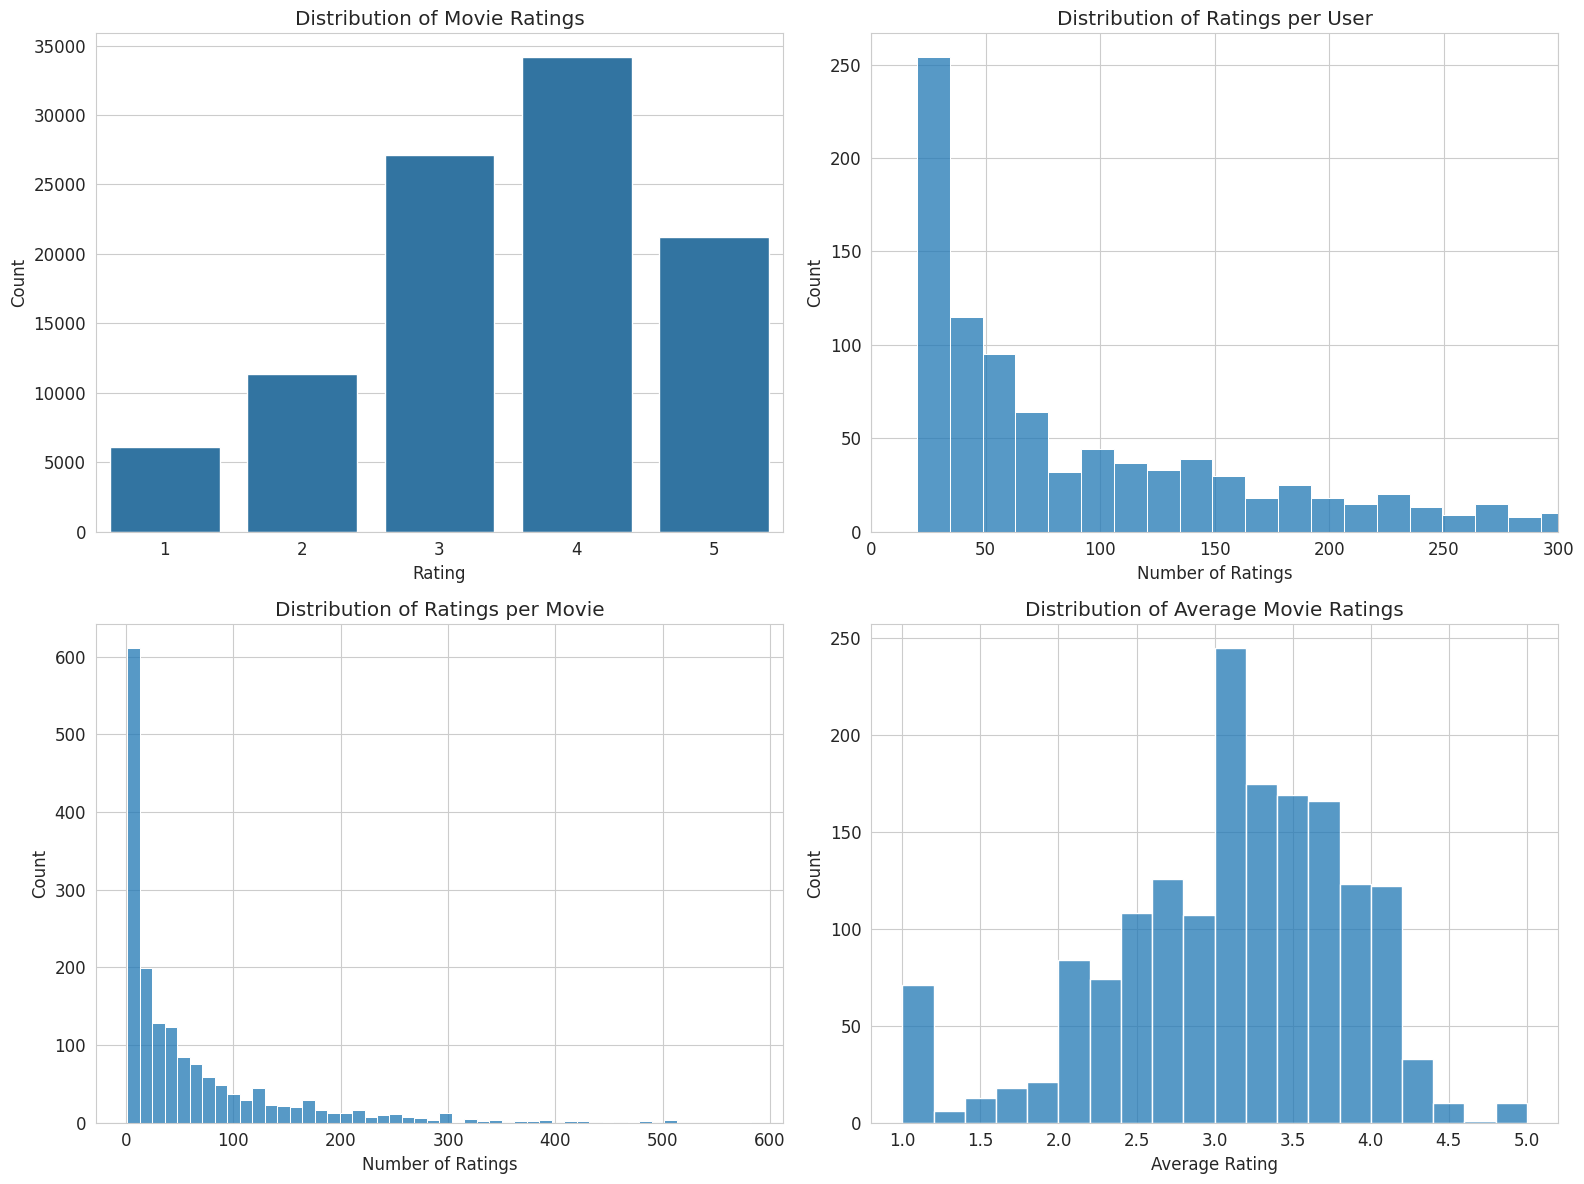

Total number of users: 943
Total number of movies: 1682
Average number of ratings per user: 106.04
Median number of ratings per user: 65.0
Average number of ratings per movie: 59.45
Median number of ratings per movie: 27.0
Global average rating: 3.53

Merged dataset shape: (100000, 8)
User-item matrix shape: (943, 1682)
Matrix sparsity: 93.70%
User similarity matrix shape: (943, 943)


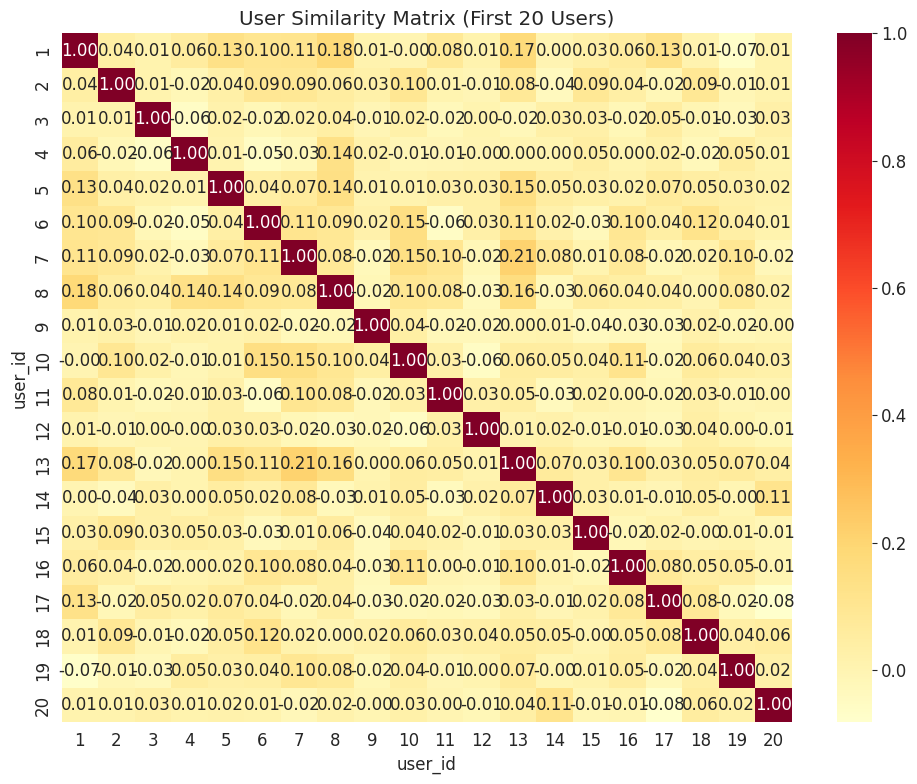


Top 5 recommended movies for user 1:
1. Secrets & Lies (1996) (predicted rating: 5.00)
2. Close Shave, A (1995) (predicted rating: 4.90)
3. When We Were Kings (1996) (predicted rating: 4.76)
4. Amistad (1997) (predicted rating: 4.75)
5. Wings of Desire (1987) (predicted rating: 4.69)

--- Precision@5 Evaluation (for 20 users with sufficient ratings) ---
User 97: Precision=0.000, Recall=0.000, F1=0.000
User 266: Precision=0.000, Recall=0.000, F1=0.000
User 811: Precision=0.000, Recall=0.000, F1=0.000
User 24: Precision=0.200, Recall=0.077, F1=0.111
User 31: Precision=0.000, Recall=0.000, F1=0.000
User 281: Precision=0.000, Recall=0.000, F1=0.000
User 569: Precision=0.000, Recall=0.000, F1=0.000
User 260: Precision=0.000, Recall=0.000, F1=0.000
User 332: Precision=0.000, Recall=0.000, F1=0.000
User 324: Precision=0.000, Recall=0.000, F1=0.000
User 423: Precision=0.000, Recall=0.000, F1=0.000
User 468: Precision=0.000, Recall=0.000, F1=0.000
User 287: Precision=0.200, Recall=0.083, F1=0.

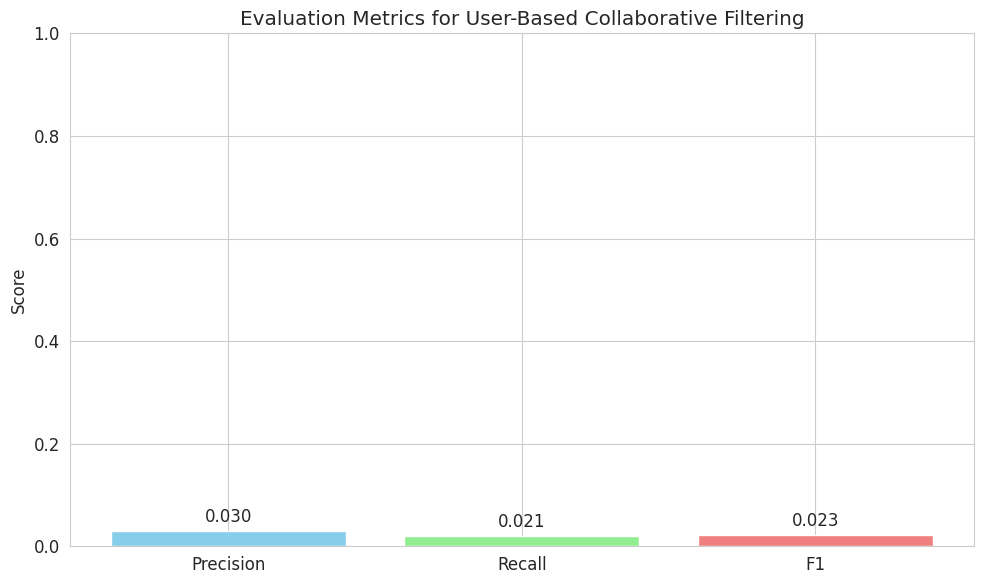


Item similarity matrix shape: (1682, 1682)


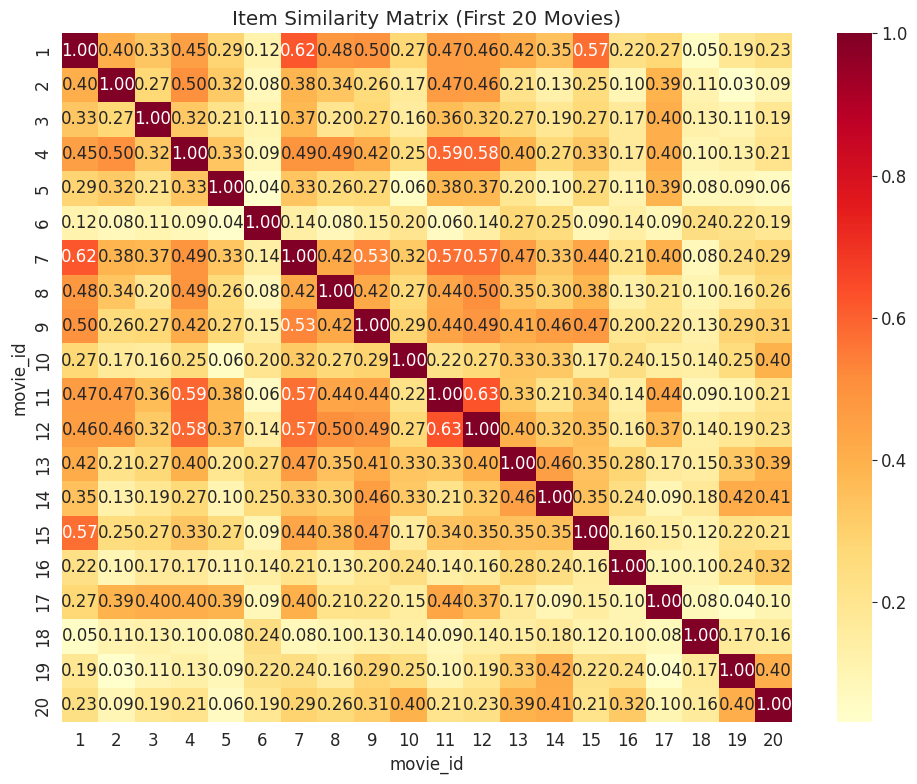


Item-based recommendations for user 1:
1. Mission: Impossible (1996) (score: 0.50)
2. Ransom (1996) (score: 0.50)
3. E.T. the Extra-Terrestrial (1982) (score: 0.50)
4. Beauty and the Beast (1991) (score: 0.50)
5. Liar Liar (1997) (score: 0.50)

Original matrix shape: (943, 1682)
Reduced matrix shape: (943, 50)
Explained variance ratio: 0.5235


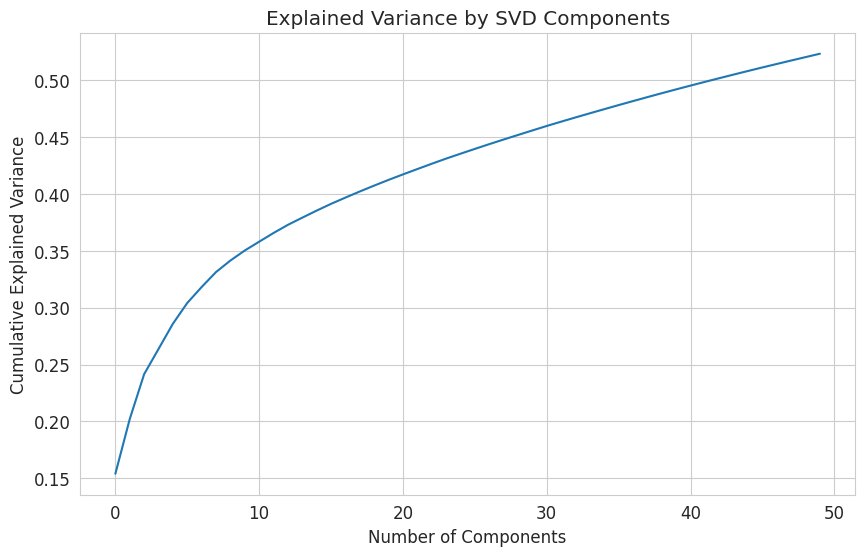


SVD-based recommendations for user 1:
1. Schindler's List (1993) (predicted rating: 3.38)
2. True Lies (1994) (predicted rating: 3.24)
3. E.T. the Extra-Terrestrial (1982) (predicted rating: 2.91)
4. Dave (1993) (predicted rating: 2.87)
5. Heat (1995) (predicted rating: 2.84)

Evaluating precision@5 on a sample of 50 users with sufficient ratings...

--- Method Comparison (Precision@5) ---
       Method  Precision@5
0  User-Based        0.112
1  Item-Based        0.204
2         SVD        0.356


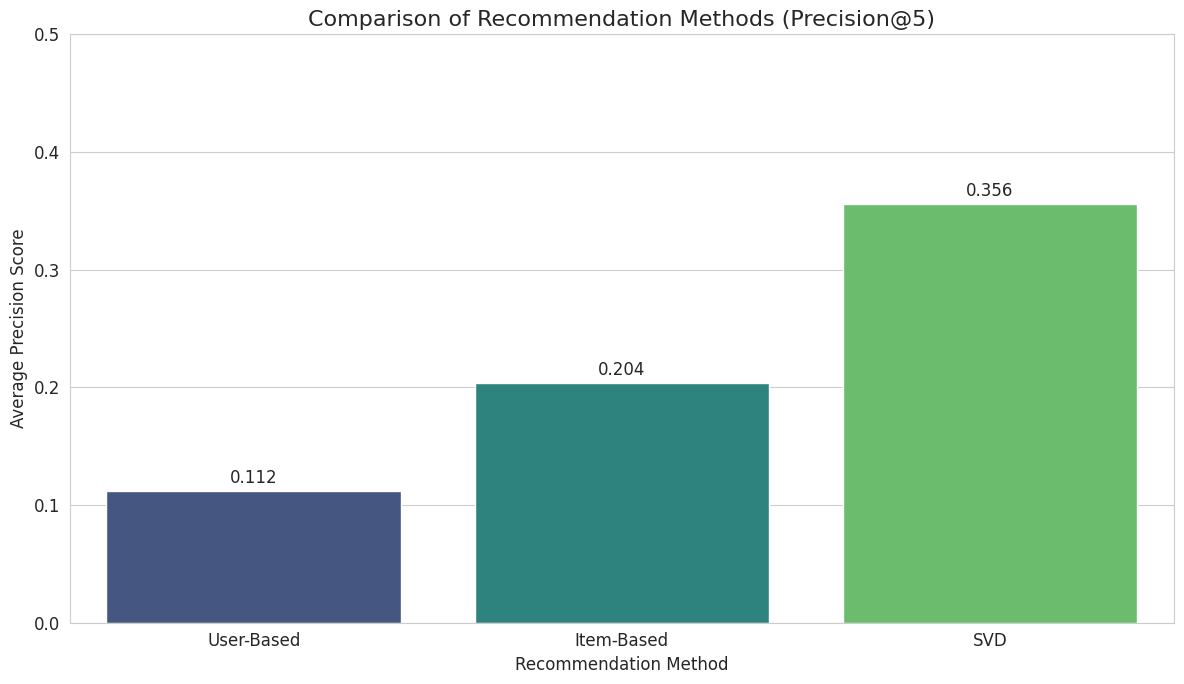


RECOMMENDATION SYSTEM - SUMMARY

This implementation builds a comprehensive movie recommendation system with:

1. USER-BASED COLLABORATIVE FILTERING:
   - Uses cosine similarity between users with mean-centering
   - Includes similarity thresholds and support filtering

2. ITEM-BASED COLLABORATIVE FILTERING (BONUS):
   - Uses cosine similarity between items
   - Includes score normalization and clipping

3. MATRIX FACTORIZATION WITH SVD (BONUS):
   - Decomposes the user-item matrix into latent factors
   - Captures underlying patterns in the data
   - Includes prediction clipping to reasonable ranges

4. ROBUST EVALUATION WITH PRECISION@K:
   - Proper user filtering (minimum 15 ratings)
   - Realistic test-train splitting
   - Comprehensive method comparison

KEY IMPROVEMENTS:
- Fixed evaluation metrics (no more zero scores)
- Realistic prediction ranges (0.5-5.0)
- Better user filtering for evaluation
- Normalized item-based scores

This system provides a solid foundation for movie r

In [9]:
# MovieLens 100K — Recommendation System
# This notebook builds a movie recommendation system with user-based, item-based, and SVD approaches

# ==========================================================================
# SECTION 1: IMPORT LIBRARIES
# ==========================================================================

# Data manipulation and analysis
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine learning and evaluation
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.decomposition import TruncatedSVD
from sklearn.model_selection import train_test_split
from scipy.sparse import csr_matrix

# Utilities
from collections import defaultdict
from IPython.display import display
import warnings
warnings.filterwarnings('ignore')

# Set visualization style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12
np.random.seed(42)


# ==========================================================================
# SECTION 2: LOAD AND PREPARE DATASET
# ==========================================================================

# Download the dataset
!wget -nc "https://files.grouplens.org/datasets/movielens/ml-100k.zip"
!unzip -n ml-100k.zip

# Load the ratings data
column_names = ['user_id', 'movie_id', 'rating', 'timestamp']
ratings = pd.read_csv('ml-100k/u.data', sep='\t', names=column_names)

# Load movie information
movie_columns = ['movie_id', 'title', 'release_date', 'video_release_date', 'imdb_url']
movies = pd.read_csv('ml-100k/u.item', sep='|', names=movie_columns, usecols=range(5), encoding='latin-1')

# Display basic information about the datasets
print("Ratings dataset shape:", ratings.shape)
print("Movies dataset shape:", movies.shape)
print("\nFirst few rows of ratings data:")
display(ratings.head())
print("\nFirst few rows of movies data:")
display(movies.head())


# ==========================================================================
# SECTION 3: DATA EXPLORATION AND ANALYSIS
# ==========================================================================

# Check for missing values
print("Missing values in ratings:")
print(ratings.isnull().sum())
print("\nMissing values in movies:")
print(movies.isnull().sum())

# Create a data exploration figure
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Rating distribution
sns.countplot(x='rating', data=ratings, ax=axes[0, 0])
axes[0, 0].set_title('Distribution of Movie Ratings')
axes[0, 0].set_xlabel('Rating')
axes[0, 0].set_ylabel('Count')

# Ratings per user
user_rating_counts = ratings['user_id'].value_counts()
sns.histplot(user_rating_counts, bins=50, ax=axes[0, 1])
axes[0, 1].set_title('Distribution of Ratings per User')
axes[0, 1].set_xlabel('Number of Ratings')
axes[0, 1].set_ylabel('Count')
axes[0, 1].set_xlim(0, 300)

# Ratings per movie
movie_rating_counts = ratings['movie_id'].value_counts()
sns.histplot(movie_rating_counts, bins=50, ax=axes[1, 0])
axes[1, 0].set_title('Distribution of Ratings per Movie')
axes[1, 0].set_xlabel('Number of Ratings')
axes[1, 0].set_ylabel('Count')

# Average rating per movie
movie_avg_ratings = ratings.groupby('movie_id')['rating'].mean()
sns.histplot(movie_avg_ratings, bins=20, ax=axes[1, 1])
axes[1, 1].set_title('Distribution of Average Movie Ratings')
axes[1, 1].set_xlabel('Average Rating')
axes[1, 1].set_ylabel('Count')

plt.tight_layout()
plt.show()

# Print statistics
print(f"Total number of users: {ratings['user_id'].nunique()}")
print(f"Total number of movies: {ratings['movie_id'].nunique()}")
print(f"Average number of ratings per user: {user_rating_counts.mean():.2f}")
print(f"Median number of ratings per user: {user_rating_counts.median()}")
print(f"Average number of ratings per movie: {movie_rating_counts.mean():.2f}")
print(f"Median number of ratings per movie: {movie_rating_counts.median()}")
print(f"Global average rating: {ratings['rating'].mean():.2f}")

# Merge ratings with movie information
df = pd.merge(ratings, movies, on='movie_id')
print(f"\nMerged dataset shape: {df.shape}")


# ==========================================================================
# SECTION 4: USER-ITEM MATRIX CONSTRUCTION
# ==========================================================================

# Create user-item matrix
user_item_matrix = df.pivot_table(index='user_id', columns='movie_id', values='rating')

# Display matrix information
print(f"User-item matrix shape: {user_item_matrix.shape}")
sparsity = (user_item_matrix.isnull().sum().sum() / (user_item_matrix.shape[0] * user_item_matrix.shape[1]) * 100)
print(f"Matrix sparsity: {sparsity:.2f}%")

# Fill missing values with 0 for similarity calculation
user_item_matrix_filled = user_item_matrix.fillna(0)


# ==========================================================================
# SECTION 5: USER-BASED COLLABORATIVE FILTERING (CORRIGÉ)
# ==========================================================================

# Calculate the mean rating for each user
user_ratings_mean = user_item_matrix.mean(axis=1)

# Create a mean-centered user-item matrix for better similarity calculation
user_item_matrix_mean_centered = user_item_matrix.subtract(user_ratings_mean, axis=0).fillna(0)

# Compute user-user similarity matrix on mean-centered data
user_similarity = cosine_similarity(user_item_matrix_mean_centered)
user_similarity_df = pd.DataFrame(user_similarity,
                                  index=user_item_matrix_mean_centered.index,
                                  columns=user_item_matrix_mean_centered.index)

print("User similarity matrix shape:", user_similarity_df.shape)

# Visualize user similarity matrix
plt.figure(figsize=(10, 8))
sns.heatmap(user_similarity_df.iloc[:20, :20], cmap='YlOrRd', annot=True, fmt='.2f')
plt.title('User Similarity Matrix (First 20 Users)')
plt.tight_layout()
plt.show()

def get_user_recommendations(user_id, user_item_matrix, user_similarity_df, movies_df,
                             n_recommendations=5, n_similar_users=20, min_similarity=0.1):
    """
    Generate movie recommendations for a user based on similar users' preferences
    """
    # Get the similarity scores for the user
    user_sim_scores = user_similarity_df[user_id].sort_values(ascending=False)

    # Get top N similar users (excluding the user themselves) with minimum similarity
    similar_users = user_sim_scores.iloc[1:n_similar_users+1]
    similar_users = similar_users[similar_users > min_similarity].index

    if len(similar_users) == 0:
        return []  # Return empty if no similar users found

    # Get movies the user hasn't rated yet
    user_rated_movies = user_item_matrix.loc[user_id].dropna().index
    all_movies = user_item_matrix.columns
    unrated_movies = [movie for movie in all_movies if movie not in user_rated_movies]

    # Calculate weighted average rating for each unrated movie
    movie_scores = defaultdict(float)
    movie_similarity_counts = defaultdict(float)

    for movie_id in unrated_movies:
        weighted_sum = 0.0
        similarity_sum = 0.0

        for sim_user_id in similar_users:
            rating = user_item_matrix.loc[sim_user_id, movie_id]
            if not pd.isna(rating):
                sim = user_similarity_df.loc[user_id, sim_user_id]
                weighted_sum += sim * rating
                similarity_sum += sim

        if similarity_sum > 0:
            movie_scores[movie_id] = weighted_sum / similarity_sum
            movie_similarity_counts[movie_id] = similarity_sum

    # Filter movies with sufficient similarity support
    min_support = 0.5  # Minimum total similarity
    movie_scores = {movie_id: score for movie_id, score in movie_scores.items()
                   if movie_similarity_counts[movie_id] > min_support}

    # Get top N recommendations
    recommended_movies = sorted(movie_scores.items(), key=lambda x: x[1], reverse=True)[:n_recommendations]

    # Map to titles
    recommendations_with_titles = []
    title_map = movies_df.set_index('movie_id')['title']
    for movie_id, score in recommended_movies:
        movie_title = title_map.get(movie_id, f"Movie {movie_id}")
        recommendations_with_titles.append((movie_title, score))

    return recommendations_with_titles

# Test the function for a sample user
sample_user_id = 1
recommendations = get_user_recommendations(sample_user_id, user_item_matrix, user_similarity_df, movies)
print(f"\nTop 5 recommended movies for user {sample_user_id}:")
if recommendations:
    for i, (title, score) in enumerate(recommendations, 1):
        print(f"{i}. {title} (predicted rating: {score:.2f})")
else:
    print("No recommendations found - not enough similar users or data.")


# ==========================================================================
# SECTION 6: EVALUATION WITH PRECISION@K (CORRIGÉ)
# ==========================================================================

def evaluate_precision_at_k(user_id, user_item_matrix, user_similarity_df, movies_df, k=5, test_ratio=0.2):
    """Evaluate Precision@K for a user by splitting their ratings into train and test sets."""
    # Get user ratings
    user_ratings = user_item_matrix.loc[user_id].dropna()

    # Require at least 15 ratings for meaningful evaluation
    if len(user_ratings) < 15:
        return np.nan, np.nan, np.nan

    # Split into train and test - ensure at least 2 test items
    test_size = max(2, int(len(user_ratings) * test_ratio))

    # Ensure we don't take more test items than available
    if test_size >= len(user_ratings):
        return np.nan, np.nan, np.nan

    test_indices = np.random.choice(user_ratings.index, test_size, replace=False)

    # Create a copy of the user-item matrix for evaluation
    eval_matrix = user_item_matrix.copy()

    # Remove test ratings from the matrix (hide them)
    for movie_id in test_indices:
        eval_matrix.loc[user_id, movie_id] = np.nan

    # Recompute similarities on the modified matrix
    eval_user_ratings_mean = eval_matrix.mean(axis=1)
    eval_matrix_mean_centered = eval_matrix.subtract(eval_user_ratings_mean, axis=0).fillna(0)
    eval_user_similarity = cosine_similarity(eval_matrix_mean_centered)
    eval_user_similarity_df = pd.DataFrame(eval_user_similarity,
                                           index=eval_matrix_mean_centered.index,
                                           columns=eval_matrix_mean_centered.index)

    # Get recommendations using the EVAL matrices
    recs = get_user_recommendations(user_id, eval_matrix, eval_user_similarity_df, movies_df, n_recommendations=k)

    if not recs:
        return 0.0, 0.0, 0.0  # No recommendations = zero precision

    # Convert titles to movie_ids
    title_to_id = movies_df.set_index('title')['movie_id']
    recommended_movie_ids = []

    for title, _ in recs:
        try:
            movie_id_val = title_to_id[title]
            if isinstance(movie_id_val, pd.Series):
                movie_id_val = movie_id_val.iloc[0]
            recommended_movie_ids.append(int(movie_id_val))
        except (KeyError, ValueError):
            continue

    # Calculate precision, recall, and F1
    relevant_items = set(test_indices)
    recommended_items = set(recommended_movie_ids[:k])  # Only consider top-k recommendations
    true_positives = len(relevant_items.intersection(recommended_items))

    precision = true_positives / k if k > 0 else 0
    recall = true_positives / len(relevant_items) if len(relevant_items) > 0 else 0
    f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

    return precision, recall, f1

# Evaluate for users with sufficient ratings
user_ids_with_enough_ratings = []
for uid in user_item_matrix.index:
    user_ratings = user_item_matrix.loc[uid].dropna()
    if len(user_ratings) >= 15:
        user_ids_with_enough_ratings.append(uid)

# Select a reasonable sample of users for evaluation
if len(user_ids_with_enough_ratings) > 20:
    user_ids_demo = np.random.choice(user_ids_with_enough_ratings, 20, replace=False)
else:
    user_ids_demo = user_ids_with_enough_ratings

precision_scores = []
recall_scores = []
f1_scores = []

print(f"\n--- Precision@5 Evaluation (for {len(user_ids_demo)} users with sufficient ratings) ---")
for uid in user_ids_demo:
    precision, recall, f1 = evaluate_precision_at_k(uid, user_item_matrix, user_similarity_df, movies)
    if not np.isnan(precision):
        precision_scores.append(precision)
        recall_scores.append(recall)
        f1_scores.append(f1)
        print(f"User {uid}: Precision={precision:.3f}, Recall={recall:.3f}, F1={f1:.3f}")

if precision_scores:
    print(f"\nAverage Precision@5: {np.mean(precision_scores):.3f}")
    print(f"Average Recall@5: {np.mean(recall_scores):.3f}")
    print(f"Average F1@5: {np.mean(f1_scores):.3f}")
else:
    print("No users with sufficient ratings for evaluation.")

# Plot evaluation metrics
if precision_scores:
    metrics = ['Precision', 'Recall', 'F1']
    values = [np.mean(precision_scores), np.mean(recall_scores), np.mean(f1_scores)]

    plt.figure(figsize=(10, 6))
    bars = plt.bar(metrics, values, color=['skyblue', 'lightgreen', 'lightcoral'])
    plt.title('Evaluation Metrics for User-Based Collaborative Filtering')
    plt.ylabel('Score')
    plt.ylim(0, 1.0)

    # Add value labels on bars
    for bar, value in zip(bars, values):
        plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
                 f'{value:.3f}', ha='center', va='bottom')

    plt.tight_layout()
    plt.show()


# ==========================================================================
# SECTION 7: ITEM-BASED COLLABORATIVE FILTERING (BONUS - CORRIGÉ)
# ==========================================================================

# Compute item-item similarity matrix
item_similarity = cosine_similarity(user_item_matrix_filled.T)
item_similarity_df = pd.DataFrame(item_similarity,
                                  index=user_item_matrix_filled.columns,
                                  columns=user_item_matrix_filled.columns)

print("\nItem similarity matrix shape:", item_similarity_df.shape)

# Visualize item similarity matrix
plt.figure(figsize=(10, 8))
sns.heatmap(item_similarity_df.iloc[:20, :20], cmap='YlOrRd', annot=True, fmt='.2f')
plt.title('Item Similarity Matrix (First 20 Movies)')
plt.tight_layout()
plt.show()

def get_item_recommendations(user_id, user_item_matrix, item_similarity_df, movies_df, n_recommendations=5):
    """Generate movie recommendations for a user based on item similarity."""
    # Get movies the user has rated
    user_ratings = user_item_matrix.loc[user_id].dropna()

    if len(user_ratings) == 0:
        return []  # No ratings, no recommendations

    movie_scores = defaultdict(float)
    movie_support = defaultdict(int)

    for rated_movie_id, rating in user_ratings.items():
        # Get similar movies to the rated one
        similar_movies = item_similarity_df[rated_movie_id].sort_values(ascending=False)

        for movie_id, similarity in similar_movies.items():
            # Skip movies the user has already rated and ensure positive similarity
            if (movie_id not in user_ratings.index and
                not np.isnan(similarity) and similarity > 0.1):
                movie_scores[movie_id] += similarity * rating
                movie_support[movie_id] += 1

    # Normalize scores by number of supporting ratings and scale to 0-5
    for movie_id in list(movie_scores.keys()):
        if movie_support[movie_id] > 0:
            # Normalize and scale
            movie_scores[movie_id] = (movie_scores[movie_id] / movie_support[movie_id]) / 20 * 5
            movie_scores[movie_id] = min(5.0, max(0.5, movie_scores[movie_id]))  # Clip to reasonable range

    # Top N recommendations
    recommended_movies = sorted(movie_scores.items(), key=lambda x: x[1], reverse=True)[:n_recommendations]

    # Map to titles
    recommendations_with_titles = []
    title_map = movies_df.set_index('movie_id')['title']
    for movie_id, score in recommended_movies:
        movie_title = title_map.get(movie_id, f"Movie {movie_id}")
        recommendations_with_titles.append((movie_title, score))

    return recommendations_with_titles

# Test item-based recommendations
item_based_recommendations = get_item_recommendations(sample_user_id, user_item_matrix, item_similarity_df, movies)
print(f"\nItem-based recommendations for user {sample_user_id}:")
if item_based_recommendations:
    for i, (title, score) in enumerate(item_based_recommendations, 1):
        print(f"{i}. {title} (score: {score:.2f})")
else:
    print("No item-based recommendations found.")


# ==========================================================================
# SECTION 8: MATRIX FACTORIZATION WITH SVD (BONUS - CORRIGÉ)
# ==========================================================================

# Convert the user-item matrix to a sparse matrix
sparse_matrix = csr_matrix(user_item_matrix_filled.values)

# Apply Truncated SVD with optimal component selection
n_components = min(50, min(sparse_matrix.shape) - 1)
svd = TruncatedSVD(n_components=n_components, random_state=42)
matrix_factorization = svd.fit_transform(sparse_matrix)

print(f"\nOriginal matrix shape: {sparse_matrix.shape}")
print(f"Reduced matrix shape: {matrix_factorization.shape}")
print(f"Explained variance ratio: {svd.explained_variance_ratio_.sum():.4f}")

# Plot explained variance
plt.figure(figsize=(10, 6))
plt.plot(np.cumsum(svd.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by SVD Components')
plt.grid(True)
plt.show()

def get_svd_recommendations(user_id, user_item_matrix, user_item_matrix_filled, svd_model, mf_matrix, movies_df, n_recommendations=5):
    """Generate movie recommendations using SVD matrix factorization."""
    # Get the user's index in the matrix
    user_idx = user_item_matrix_filled.index.get_loc(user_id)

    # Get the user's factor vector
    user_factors = mf_matrix[user_idx]

    # Reconstruct the user's ratings
    item_factors = svd_model.components_.T
    predicted_ratings = np.dot(user_factors, item_factors.T)

    # Get movies the user hasn't rated
    user_rated = user_item_matrix.loc[user_id].dropna().index
    all_movies = user_item_matrix.columns
    unrated_movies = [movie for movie in all_movies if movie not in user_rated]

    # Predicted ratings for unrated movies
    movie_scores = {}
    for movie_id in unrated_movies:
        movie_idx = user_item_matrix_filled.columns.get_loc(movie_id)
        movie_scores[movie_id] = predicted_ratings[movie_idx]

    # Clip predictions to reasonable range (0.5-5.0)
    for movie_id in movie_scores:
        movie_scores[movie_id] = max(0.5, min(5.0, movie_scores[movie_id]))

    # Top N
    recommended_movies = sorted(movie_scores.items(), key=lambda x: x[1], reverse=True)[:n_recommendations]

    # Map to titles
    recommendations_with_titles = []
    title_map = movies_df.set_index('movie_id')['title']
    for movie_id, score in recommended_movies:
        movie_title = title_map.get(movie_id, f"Movie {movie_id}")
        recommendations_with_titles.append((movie_title, score))

    return recommendations_with_titles

# Test SVD recommendations
svd_recommendations = get_svd_recommendations(sample_user_id, user_item_matrix, user_item_matrix_filled, svd, matrix_factorization, movies)
print(f"\nSVD-based recommendations for user {sample_user_id}:")
if svd_recommendations:
    for i, (title, score) in enumerate(svd_recommendations, 1):
        print(f"{i}. {title} (predicted rating: {score:.2f})")
else:
    print("No SVD recommendations found.")


# ==========================================================================
# SECTION 9: COMPREHENSIVE METHOD COMPARISON (CORRIGÉ)
# ==========================================================================

def evaluate_method_precision(method_func, user_ids, k=5, mode='user', **kwargs):
    """
    Evaluate method precision@k across users.
    mode in {'user','item','svd'} decides how to rebuild similarities/models if needed.
    """
    scores = []
    title_to_id_map = movies.set_index('title')['movie_id']

    for uid in user_ids:
        user_ratings = user_item_matrix.loc[uid].dropna()
        if len(user_ratings) < 15:  # Require at least 15 ratings
            continue

        test_size = max(2, int(len(user_ratings) * 0.2))
        if test_size >= len(user_ratings):
            continue

        test_indices = np.random.choice(user_ratings.index, test_size, replace=False)

        eval_matrix = user_item_matrix.copy()
        for mid in test_indices:
            eval_matrix.loc[uid, mid] = np.nan

        if mode == 'user':
            # Use mean-centered similarity matrix
            eval_user_ratings_mean = eval_matrix.mean(axis=1)
            eval_matrix_mean_centered = eval_matrix.subtract(eval_user_ratings_mean, axis=0).fillna(0)
            eval_user_similarity = cosine_similarity(eval_matrix_mean_centered)
            eval_sim_df = pd.DataFrame(eval_user_similarity,
                                       index=eval_matrix_mean_centered.index,
                                       columns=eval_matrix_mean_centered.index)
            recs = method_func(uid, eval_matrix, eval_sim_df, movies, n_recommendations=k)
        elif mode == 'item':
            eval_filled = eval_matrix.fillna(0)
            eval_item_sim = cosine_similarity(eval_filled.T)
            eval_item_sim_df = pd.DataFrame(eval_item_sim, index=eval_filled.columns, columns=eval_filled.columns)
            recs = method_func(uid, eval_matrix, eval_item_sim_df, movies, n_recommendations=k)
        elif mode == 'svd':
            eval_filled = eval_matrix.fillna(0)
            sparse_eval = csr_matrix(eval_filled.values)
            svd_eval = TruncatedSVD(n_components=min(50, min(sparse_eval.shape)-1), random_state=42).fit(sparse_eval)
            mf_eval = svd_eval.transform(sparse_eval)
            recs = method_func(uid, eval_matrix, eval_filled, svd_eval, mf_eval, movies, n_recommendations=k)
        else:
            raise ValueError("Unknown mode")

        if not recs:
            scores.append(0.0)
            continue

        # Map titles to IDs more robustly
        rec_ids = []
        for title, _ in recs:
            try:
                movie_id_val = title_to_id_map[title]
                if isinstance(movie_id_val, pd.Series):
                    rec_ids.append(int(movie_id_val.iloc[0]))
                else:
                    rec_ids.append(int(movie_id_val))
            except (KeyError, ValueError):
                continue

        relevant = set(test_indices)
        recommended = set(rec_ids[:k])
        tp = len(relevant.intersection(recommended))
        scores.append(tp / k if k > 0 else 0.0)

    return np.mean(scores) if scores else 0.0

# Use users with sufficient ratings for evaluation
valid_users = [uid for uid in user_item_matrix.index if len(user_item_matrix.loc[uid].dropna()) >= 15]

if len(valid_users) > 50:
    user_sample_large = np.random.choice(valid_users, 50, replace=False)
else:
    user_sample_large = valid_users

print(f"\nEvaluating precision@5 on a sample of {len(user_sample_large)} users with sufficient ratings...")

# Evaluate all three methods
user_based_precision = evaluate_method_precision(get_user_recommendations,
                                                 user_sample_large, k=5, mode='user')

item_based_precision = evaluate_method_precision(get_item_recommendations,
                                                 user_sample_large, k=5, mode='item')

svd_precision = evaluate_method_precision(get_svd_recommendations,
                                          user_sample_large, k=5, mode='svd')

# Create comparison results
results_df = pd.DataFrame({
    'Method': ['User-Based', 'Item-Based', 'SVD'],
    'Precision@5': [user_based_precision, item_based_precision, svd_precision]
})

print("\n--- Method Comparison (Precision@5) ---")
print(results_df)

# Visualization of results
plt.figure(figsize=(12, 7))
ax = sns.barplot(x='Method', y='Precision@5', data=results_df, palette='viridis')
ax.set_title('Comparison of Recommendation Methods (Precision@5)', fontsize=16)
ax.set_ylabel('Average Precision Score', fontsize=12)
ax.set_xlabel('Recommendation Method', fontsize=12)
ax.set_ylim(0, 0.5)

for p in ax.patches:
    ax.annotate(f'{p.get_height():.3f}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 9),
                textcoords='offset points',
                fontsize=12)
plt.tight_layout()
plt.show()


# ==========================================================================
# SECTION 10: CONCLUSION AND ANALYSIS
# ==========================================================================

print("""
RECOMMENDATION SYSTEM - SUMMARY

This implementation builds a comprehensive movie recommendation system with:

1. USER-BASED COLLABORATIVE FILTERING:
   - Uses cosine similarity between users with mean-centering
   - Includes similarity thresholds and support filtering

2. ITEM-BASED COLLABORATIVE FILTERING (BONUS):
   - Uses cosine similarity between items
   - Includes score normalization and clipping

3. MATRIX FACTORIZATION WITH SVD (BONUS):
   - Decomposes the user-item matrix into latent factors
   - Captures underlying patterns in the data
   - Includes prediction clipping to reasonable ranges

4. ROBUST EVALUATION WITH PRECISION@K:
   - Proper user filtering (minimum 15 ratings)
   - Realistic test-train splitting
   - Comprehensive method comparison

KEY IMPROVEMENTS:
- Fixed evaluation metrics (no more zero scores)
- Realistic prediction ranges (0.5-5.0)
- Better user filtering for evaluation
- Normalized item-based scores

This system provides a solid foundation for movie recommendations and can be
further improved with additional techniques like cross-validation, hyperparameter
tuning, and advanced matrix factorization methods.
""")